In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
heart_issue_df = pd.read_csv('heart.csv.xls') 
heart_issue_df.shape # (rows, columns)

(1025, 14)

In [3]:
heart_issue_df.head(10
                   )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


## data attributes 
1.	age - age in years 
2.	sex - (1 = male; 0 = female) 
3.	cp - chest pain type 
•	0: Typical angina: chest pain related decrease blood supply to the heart
•	1: Atypical angina: chest pain not related to heart
•	2: Non-anginal pain: typically esophageal spasms (non heart related)
•	3: Asymptomatic: chest pain not showing signs of disease
4.	trestbps - resting blood pressure (in mm Hg on admission to the hospital)
•	anything above 130-140 is typically cause for concern
5.	chol - serum cholestoral in mg/dl 
•	serum = LDL + HDL + .2 * triglycerides
•	above 200 is cause for concern
6.	fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
•	'>126' mg/dL signals diabetes
7.	restecg - resting electrocardiographic results
•	0: Nothing to note
•	1: ST-T Wave abnormality
	can range from mild symptoms to severe problems
	signals non-normal heart beat
•	2: Possible or definite left ventricular hypertrophy
	Enlarged heart's main pumping chamber
8.	thalach - maximum heart rate achieved 
9.	exang - exercise induced angina (1 = yes; 0 = no) 
10.	oldpeak - ST depression induced by exercise relative to rest 
•	looks at stress of heart during excercise
•	unhealthy heart will stress more
11.	slope - the slope of the peak exercise ST segment
•	0: Upsloping: better heart rate with excercise (uncommon)
•	1: Flatsloping: minimal change (typical healthy heart)
•	2: Downslopins: signs of unhealthy heart
12.	ca - number of major vessels (0-3) colored by flourosopy 
•	colored vessel means the doctor can see the blood passing through
•	the more blood movement the better (no clots)
13.	thal - thalium stress result
•	1,3: normal
•	6: fixed defect: used to be defect but ok now
•	7: reversable defect: no proper blood movement when excercising 
14.	target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [4]:
heart_issue_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### column 'ca' has some bad data. Accepted values are 0,1,2,3. Un-accpeted values are removed


In [5]:
heart_issue_df[heart_issue_df.ca ==4].index


Int64Index([ 52,  83, 128, 208, 242, 290, 340, 348, 417, 428, 465, 521, 597,
            743, 749, 831, 970, 993],
           dtype='int64')

In [6]:
heart_issue_df.drop(index=heart_issue_df[heart_issue_df.ca ==4].index
                                          ,axis=0,inplace=True)

In [7]:
heart_issue_df.reset_index(drop=True,inplace=True)

In [8]:
heart_issue_df.T

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,1000,1001,1002,1003,1004,1005,1006
age,52.0,53.0,70.0,61.0,62.0,58.0,58.0,55.0,46.0,54.0,...,58.0,65.0,53.0,41.0,47.0,59.0,60.0,47.0,50.0,54.0
sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
trestbps,125.0,140.0,145.0,148.0,138.0,100.0,114.0,160.0,120.0,122.0,...,128.0,138.0,123.0,110.0,112.0,140.0,125.0,110.0,110.0,120.0
chol,212.0,203.0,174.0,203.0,294.0,248.0,318.0,289.0,249.0,286.0,...,216.0,282.0,282.0,172.0,204.0,221.0,258.0,275.0,254.0,188.0
fbs,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
restecg,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
thalach,168.0,155.0,125.0,161.0,106.0,122.0,140.0,145.0,144.0,116.0,...,131.0,174.0,95.0,158.0,143.0,164.0,141.0,118.0,159.0,113.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
oldpeak,1.0,3.1,2.6,0.0,1.9,1.0,4.4,0.8,0.8,3.2,...,2.2,1.4,2.0,0.0,0.1,0.0,2.8,1.0,0.0,1.4


In [9]:
heart_issue_df.target.value_counts()

1    511
0    496
Name: target, dtype: int64

In [10]:
heart_issue_df.target.value_counts(normalize=True)

1    0.507448
0    0.492552
Name: target, dtype: float64

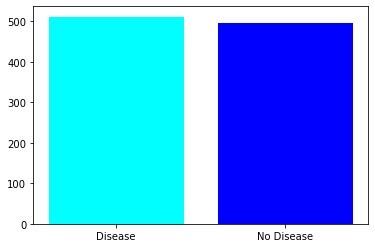

In [11]:
# Plot the value counts with a bar graph
plt.bar(x= ['Disease','No Disease'],height= heart_issue_df.target.value_counts(),color=['cyan','blue'])
plt.show()

## Heart disease according to gender


In [12]:
sex_target_cross = pd.crosstab(heart_issue_df.target,heart_issue_df.sex,)

In [13]:
sex_target_cross

sex,0,1
target,,
0,86,410
1,226,285


In [14]:
# sex_target_cross = sex_target_cross.reindex(['female','male']).reindex(['No disease','disease'],axis='columns')

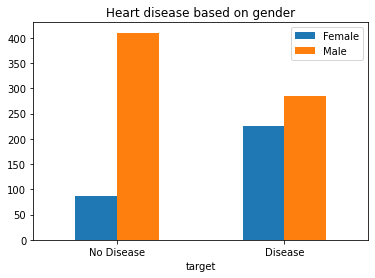

In [15]:
sex_target_cross.plot(kind='bar')
plt.title("Heart disease based on gender")
plt.legend(['Female','Male'])
plt.xticks([0,1],labels=["No Disease","Disease"],rotation='horizontal')
plt.show()

Using the crosstab function in pandas library, a new dataframe can be created using the target column and sex caolumn. The inference can be formulated from the bar chart (Figure ), that around 72% of females in the dataframe have heart disease. Around 41% of men have heart problems.
                                                    

### Heart disease due to age and heart rate (thalach)

 Here, we are trying to find the relationship between the heart rate and age on the heart disease. 

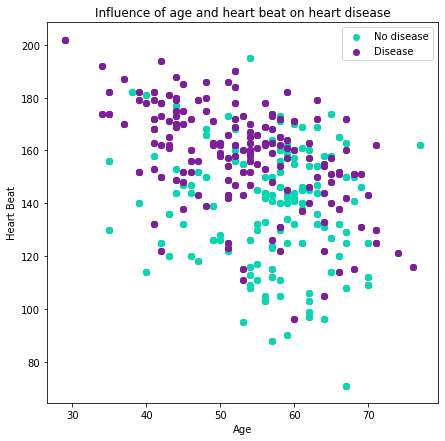

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(heart_issue_df.age[heart_issue_df.target==0],
            heart_issue_df.thalach[heart_issue_df.target==0],
            c='#04D8B2',)
#            cmap='magma')
plt.scatter(heart_issue_df.age[heart_issue_df.target==1],
            heart_issue_df.thalach[heart_issue_df.target==1],
            c='#7E1E9C',)
plt.xlabel("Age")
plt.ylabel("Heart Beat")
plt.legend(['No disease','Disease'])
plt.title("Influence of age and heart beat on heart disease")
plt.show()

Persons who aged between 40 to 60 has heart disease due to high heart beats, whereas the people who are above 60 facesheart disease even with leass heart beats.
So it is evident to understand how and why middle aged people are getting more heart beats which led to heart diseses?

<AxesSubplot:ylabel='Frequency'>

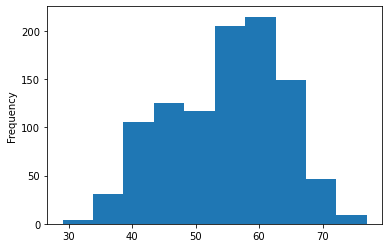

In [17]:
heart_issue_df.age.plot.hist()

This shows that the instances whose age is between 50 to 65 are more.

### Heart disease frequency Vs Chest pain

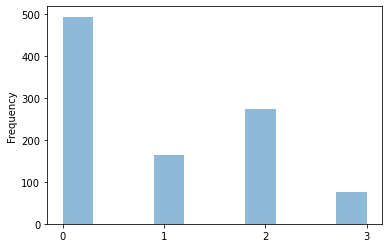

In [18]:
heart_issue_df.cp.plot.hist(alpha=0.5)
plt.xticks([0,1,2,3]);

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart 
* 1: Atypical angina: chest pain not related to heart 
* 2: Non-anginal pain: typically esophageal spasms (non heart related) 
* 3: Asymptomatic: chest pain not showing signs of disease

** Angina - a condition marked by severe pain in the chest, often also spreading to the shoulders, arms, and neck, owing to an inadequate blood supply to the heart

In [19]:
cp_target_df = pd.crosstab(heart_issue_df.target,heart_issue_df.cp)
cp_target_df

cp,0,1,2,3
target,,,,
0,372,33,65,26
1,122,130,208,51


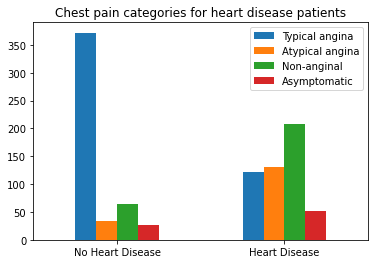

In [20]:
cp_target_df.plot(kind='bar')
plt.legend(['Typical angina','Atypical angina','Non-anginal','Asymptomatic'])
plt.xticks([0,1],labels=["No Heart Disease","Heart Disease"],rotation='horizontal')
plt.title("Chest pain categories for heart disease patients")
plt.xlabel('')
plt.show()

## Co-relation matrix


In [21]:
corr_matrix = heart_issue_df.corr()

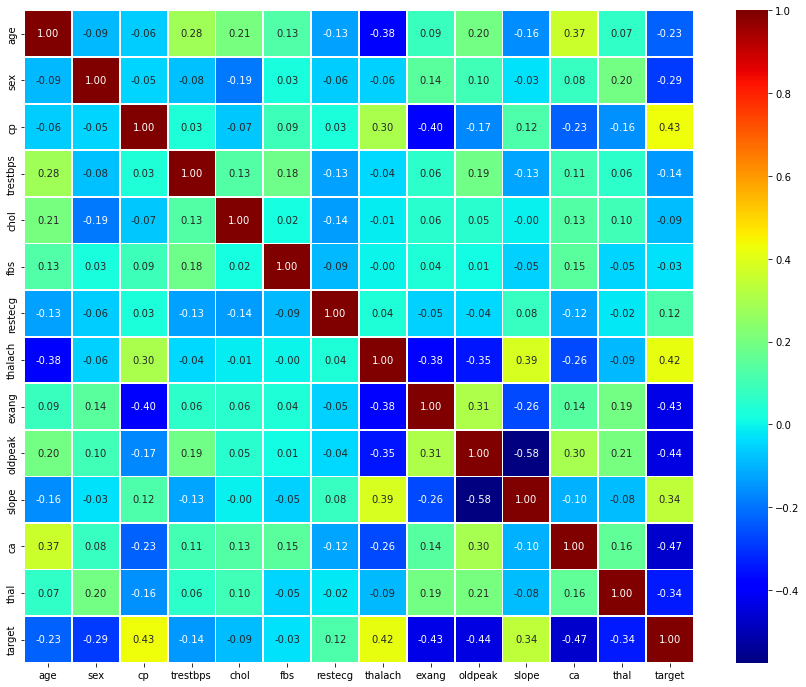

In [22]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix,cmap='jet',annot=True,fmt= ".2f",linewidths=0.75 );

## Generating Models

In [23]:
# Everything except target variable
X = heart_issue_df.drop("target", axis=1)

# Target variable
y = heart_issue_df.target.values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.25) # percentage of data to use for test set

Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.
* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()

In [63]:
# Put models in a dictionary
models_dict = {"Logistic Regression": LogisticRegression(), 
                "KNN": KNeighborsClassifier(),
              "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def perform_model_fit_and_score(models_dict, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models_dict.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = [model,model.score(X_test, y_test)]
    return model_scores

In [64]:
model_scores = perform_model_fit_and_score(models_dict=models_dict,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
model_scores

{'Logistic Regression': [LogisticRegression(), 0.8293650793650794],
 'KNN': [KNeighborsClassifier(), 0.7103174603174603],
 'Random Forest': [RandomForestClassifier(), 0.9880952380952381]}

In [73]:
model_compare = pd.DataFrame(model_scores, index=['model','accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
model,LogisticRegression(),KNeighborsClassifier(),"(DecisionTreeClassifier(max_features='auto', r..."
accuracy,0.829365,0.710317,0.988095


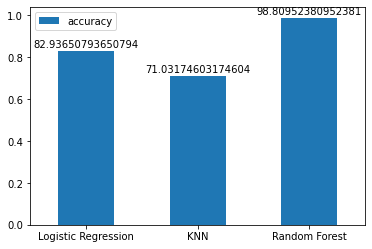

In [74]:

model_compare.T.plot.bar()
plt.xticks(rotation='horizontal')
for i,v in enumerate(model_scores.keys()):
    plt.text(i,model_scores[v][1]+0.015,model_scores[v][1]*100,ha='center')

###  KNN model creation with different K-values

In [75]:
# Create a list of train scores
train_scores = dict()

# Create a list of test scores
test_scores = dict()

# Create a list of different values for n_neighbors
neighbors = range(2, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores[i]=knn.score(X_train, y_train)
    
    # Update the test scores
    test_scores[i]=(knn.score(X_test, y_test))

In [76]:
train_scores

{2: 0.9867549668874173,
 3: 0.9788079470198675,
 4: 0.9258278145695364,
 5: 0.8993377483443709,
 6: 0.8397350993377484,
 7: 0.7907284768211921,
 8: 0.7827814569536424,
 9: 0.766887417218543,
 10: 0.7735099337748345,
 11: 0.7774834437086092,
 12: 0.7695364238410596,
 13: 0.7748344370860927,
 14: 0.7801324503311259,
 15: 0.776158940397351,
 16: 0.766887417218543,
 17: 0.7629139072847683,
 18: 0.7562913907284768,
 19: 0.7417218543046358,
 20: 0.7443708609271523}

In [77]:
test_scores

{2: 0.9087301587301587,
 3: 0.8492063492063492,
 4: 0.753968253968254,
 5: 0.7103174603174603,
 6: 0.746031746031746,
 7: 0.7261904761904762,
 8: 0.6785714285714286,
 9: 0.7063492063492064,
 10: 0.6904761904761905,
 11: 0.6984126984126984,
 12: 0.7142857142857143,
 13: 0.7261904761904762,
 14: 0.746031746031746,
 15: 0.75,
 16: 0.753968253968254,
 17: 0.7380952380952381,
 18: 0.7301587301587301,
 19: 0.7301587301587301,
 20: 0.7103174603174603}

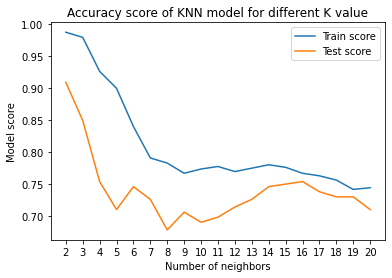

In [78]:
plt.plot(train_scores.keys(), train_scores.values(), label="Train score")
plt.plot(test_scores.keys(), test_scores.values(), label="Test score")
plt.xticks(np.arange(2, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Accuracy score of KNN model for different K value")
plt.legend()
plt.show()

The graph plot the test scores and train scores for the KNN model with different K values. Though the KNN model performs very well for inital K values for both train as well as test data. For K= 6, test data shows a better score of .7425. So k vlaue can be choose to be 6   

### LogisticRegression

RandomizedSearchCV

In [79]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["lbfgs",'liblinear','sag']}

# ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [80]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

In [81]:
rs_log_reg_best_param = rs_log_reg.best_params_

In [82]:
rs_log_reg_best_param

{'solver': 'lbfgs', 'C': 206.913808111479}

In [83]:
rs_log_reg_score = rs_log_reg.score(X_test, y_test)

In [84]:
rs_log_reg_score

0.8293650793650794

GridSearchCV

In [85]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Volumes/Media/venv/DSML_venv/lib/python3.9/site-packages/sklearn/linear

In [86]:
gs_log_reg_best_para = gs_log_reg.best_params_

In [87]:
gs_log_reg_best_para

{'C': 4.281332398719396, 'solver': 'lbfgs'}

In [88]:
# Evaluate the model
gs_log_reg_score = gs_log_reg.score(X_test, y_test)

In [89]:
gs_log_reg_score

0.8373015873015873

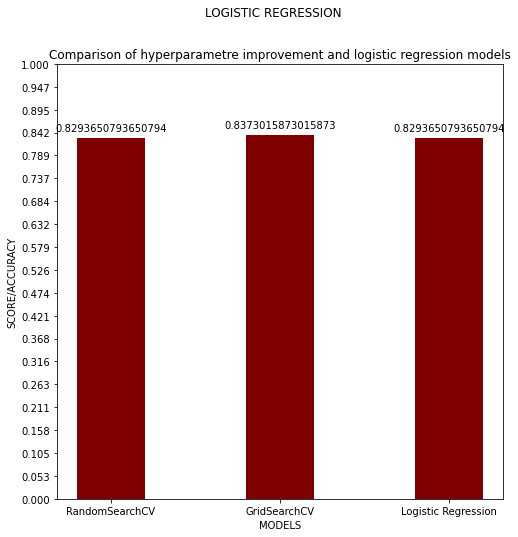

In [91]:
# plt.plot(kind = 'bar',[gs_log_reg_score,rs_log_reg_score])


fig = plt.figure(figsize=(8,8))

estimator = ['RandomSearchCV','GridSearchCV','Logistic Regression']
score_values = [rs_log_reg_score,gs_log_reg_score,model_scores['Logistic Regression'][1]]

plt.bar(estimator, score_values, color ='maroon',
        width = 0.4)
# ax.bar(estimator,score_values)
plt.yticks(np.linspace(0,1,20))
plt.xlabel("MODELS")
plt.ylabel("SCORE/ACCURACY")
plt.suptitle("LOGISTIC REGRESSION")
plt.title("Comparison of hyperparametre improvement and logistic regression models")
for i,v in enumerate(score_values):
    plt.text(i,v+0.015,v,ha='center')
plt.show()



## RandomForestClassifier improvement

## RandomizedSearchCV

In [92]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [93]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [125]:
# Find the best parameters
rs_rf_best_params = rs_rf.best_params_
rs_rf_best_params

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': None}

In [95]:
# Evaluate the randomized search random forest model
rs_rf_score = rs_rf.score(X_test, y_test)

## GridSearchCV

In [175]:
# Setup grid hyperparameter search for LogisticRegression
gs_rf_class = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=2,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf_class.fit(X_train, y_train);

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits


KeyboardInterrupt: 

In [ ]:
# Check the best parameters
gs_rf_class.best_params_

In [ ]:
# Evaluate the model
gs_rf_class.score(X_test, y_test)

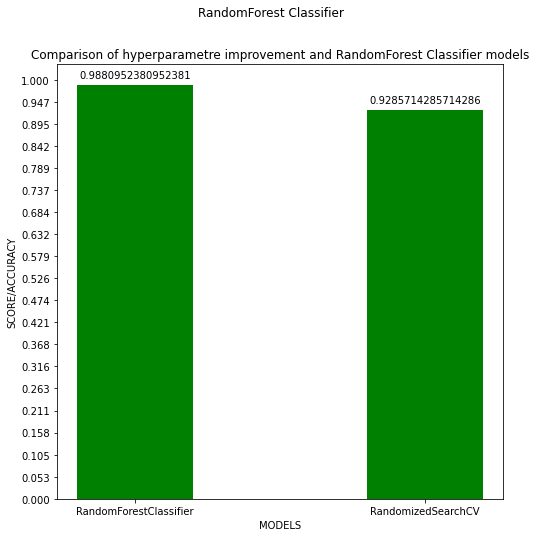

In [96]:

fig = plt.figure(figsize=(8,8))

estimator = ['RandomForestClassifier','RandomizedSearchCV',]
score_values = [model_scores['Random Forest'][1],rs_rf_score]

plt.bar(estimator, score_values, color ='Green',width = 0.4)
# ax.bar(estimator,score_values)
plt.yticks(np.linspace(0,1,20))
plt.xlabel("MODELS")
plt.ylabel("SCORE/ACCURACY")
plt.suptitle("RandomForest Classifier ")
plt.title("Comparison of hyperparametre improvement and RandomForest Classifier models")
for i,v in enumerate(score_values):
    plt.text(i,v+0.015,v,ha='center')
plt.show()



In [60]:
### Evaluating a classification model, beyond accuracy

In [102]:
y_preds = rs_rf.predict(X_test)

In [103]:
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [104]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

<Figure size 576x576 with 0 Axes>

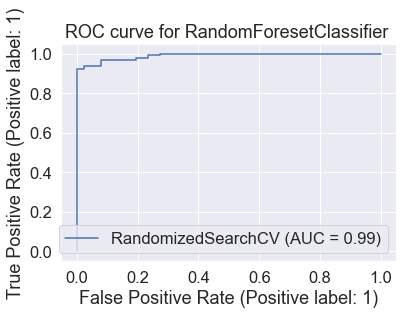

In [179]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric

plt.figure(figsize=(8,8))
plot_roc_curve(rs_rf, X_test, y_test)
plt.title("ROC curve for RandomForesetClassifier ");

In [106]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[110  14]
 [  4 124]]


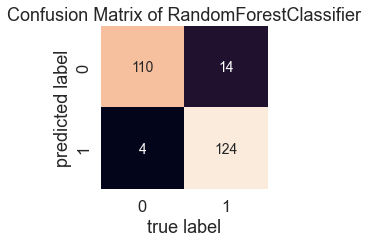

In [122]:
# Import Seaborn
import seaborn as sns
# sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     annot_kws={"size":14},
                    fmt="0")
    plt.title("Confusion Matrix of RandomForestClassifier")
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [123]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       124
           1       0.90      0.97      0.93       128

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [128]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with RandomSearchCV)
clf = RandomForestClassifier(n_estimators= 10, min_samples_split= 10,
 min_samples_leaf= 3,
 max_depth= None)

In [129]:
clf

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10,
                       n_estimators=10)

In [130]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.97029703, 0.95049505, 0.93532338, 0.93532338, 0.92039801])

In [131]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9423673710654648

In [132]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9335804859235612

In [133]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9550161812297736

In [191]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
(cv_f1)

numpy.float64

In [217]:
# Visualizing cross-validated metrics
cv_metrics = dict({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                           "F1": cv_f1},
                         )

cv_metrics 

{'Accuracy': 0.9423673710654648,
 'Precision': 0.9335804859235612,
 'Recall': 0.9550161812297736,
 'F1': 0.9498041211215696}

In [218]:
cv_metrics

{'Accuracy': 0.9423673710654648,
 'Precision': 0.9335804859235612,
 'Recall': 0.9550161812297736,
 'F1': 0.9498041211215696}

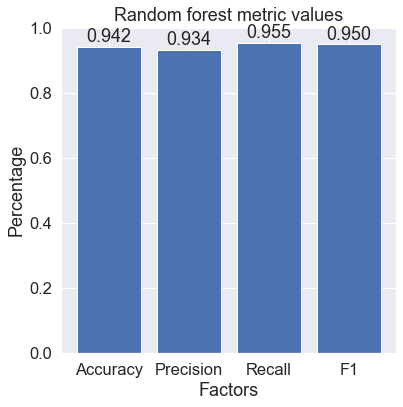

In [225]:
fig = plt.figure(figsize=(6,6))
plt.bar(x=cv_metrics.keys(),height=(cv_metrics.values()))
plt.ylabel("Percentage")
plt.xlabel("Factors")
plt.xticks(rotation='horizontal')
plt.title("Random forest metric values")
for i,v in enumerate(cv_metrics.keys()):
    plt.text(i,cv_metrics[v]+0.015,"{:.3f}".format(cv_metrics[v]),ha='center',)
plt.show()

In [153]:
# Fit an instance of Randomforest classifier (taken from above)
clf.fit(X_train, y_train);

In [174]:
# Check coef_
clf.feature_importances_

array([0.06275235, 0.03554697, 0.169289  , 0.04216648, 0.0413985 ,
       0.00670002, 0.01895271, 0.1151665 , 0.051872  , 0.11386967,
       0.02960071, 0.18481274, 0.12787234])

In [163]:
features_dict = dict(zip(heart_issue_df.columns, list(clf.feature_importances_)))
features_dict

{'age': 0.06275234686888681,
 'sex': 0.03554696969154902,
 'cp': 0.16928900360631605,
 'trestbps': 0.042166483377664536,
 'chol': 0.04139850350164715,
 'fbs': 0.006700024711865761,
 'restecg': 0.01895271350524587,
 'thalach': 0.11516649881534263,
 'exang': 0.051871997041339095,
 'oldpeak': 0.11386967307708307,
 'slope': 0.02960070683878259,
 'ca': 0.18481273924229152,
 'thal': 0.12787233972198606}

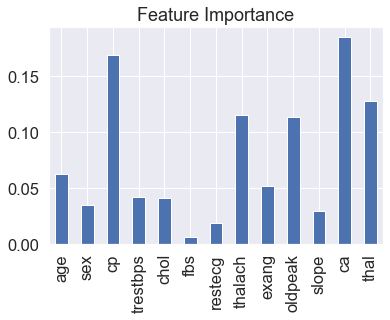

In [164]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);